In [1]:
import glob
import seaborn
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ds_temp = xr.open_dataset('/glade/campaign/cgd/tss/czarakas/'+
                           'COUP0000_PI_SOM'+
                           '/atm/hist/'+
                           'COUP0000_PI_SOM.cam.h1.0049-10.nc')
weights =ds_temp.gw/ds_temp.gw.mean(dim='lat')

ds_temp2 = xr.open_dataset('/glade/campaign/cgd/tss/czarakas/'+
                           'COUP0000_PI_SOM'+
                           '/lnd/hist/'+
                           'COUP0000_PI_SOM.clm2.h0.0049-02-01-00000.nc')

landarea=(ds_temp2.area*ds_temp2.landfrac)
landweights=landarea/landarea.mean(dim=['lat','lon'])

In [4]:
var='TLAI'
basecase_lnd=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/COUP0000_PI_SOM/lnd/proc/tseries/COUP0000_PI_SOM.clm2.h0.timeseries.'+var+'.nc')

In [10]:
ds_offline = xr.open_dataset('/glade/scratch/czarakas/archive/OFFL0000_PI_CPLhist/lnd/hist/'+
                             'OFFL0000_PI_CPLhist.clm2.h0.0049-02-01-00000.nc')

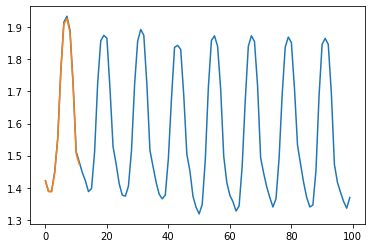

In [13]:
plt.plot((basecase_lnd[var]*landweights).mean(dim=['lat','lon'])[0:100])
plt.plot((ds_offline[var]*landweights).mean(dim=['lat','lon']))

Text(0.5, 1.0, 'Amazon')

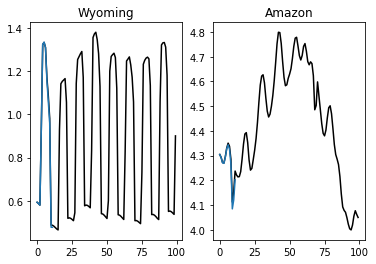

In [16]:
ilat=70
ilon=100
var='TLAI'
plt.subplot(1,2,1)
plt.plot(basecase_lnd[var][0:100,ilat,ilon],'-k')
plt.plot(ds_offline[var][:,ilat,ilon])
plt.title('Wyoming')

ilat=45
ilon=120
plt.subplot(1,2,2)
plt.plot(basecase_lnd[var][0:100,ilat,ilon],'-k')
plt.plot(ds_offline[var][:,ilat,ilon])
plt.title('Amazon')

In [17]:
basecase_lnd.time

<xarray.DataArray 'time' (time: 1668)>
array([cftime.DatetimeNoLeap(49, 2, 1, 0, 0, 0, 0, 3, 32),
       cftime.DatetimeNoLeap(49, 3, 1, 0, 0, 0, 0, 3, 60),
       cftime.DatetimeNoLeap(49, 4, 1, 0, 0, 0, 0, 6, 91), ...,
       cftime.DatetimeNoLeap(188, 11, 1, 0, 0, 0, 0, 2, 305),
       cftime.DatetimeNoLeap(188, 12, 1, 0, 0, 0, 0, 4, 335),
       cftime.DatetimeNoLeap(189, 1, 1, 0, 0, 0, 0, 0, 1)], dtype=object)
Coordinates:
  * time     (time) object 0049-02-01 00:00:00 ... 0189-01-01 00:00:00
Attributes:
    long_name:     time
    bounds:        time_bounds
    cell_methods:  time: mean

In [18]:
ds_offline.time

<xarray.DataArray 'time' (time: 12)>
array([cftime.DatetimeNoLeap(49, 2, 1, 0, 0, 0, 0, 3, 32),
       cftime.DatetimeNoLeap(49, 3, 1, 0, 0, 0, 0, 3, 60),
       cftime.DatetimeNoLeap(49, 4, 1, 0, 0, 0, 0, 6, 91),
       cftime.DatetimeNoLeap(49, 5, 1, 0, 0, 0, 0, 1, 121),
       cftime.DatetimeNoLeap(49, 6, 1, 0, 0, 0, 0, 4, 152),
       cftime.DatetimeNoLeap(49, 7, 1, 0, 0, 0, 0, 6, 182),
       cftime.DatetimeNoLeap(49, 8, 1, 0, 0, 0, 0, 2, 213),
       cftime.DatetimeNoLeap(49, 9, 1, 0, 0, 0, 0, 5, 244),
       cftime.DatetimeNoLeap(49, 10, 1, 0, 0, 0, 0, 0, 274),
       cftime.DatetimeNoLeap(49, 11, 1, 0, 0, 0, 0, 3, 305),
       cftime.DatetimeNoLeap(49, 12, 1, 0, 0, 0, 0, 5, 335),
       cftime.DatetimeNoLeap(50, 1, 1, 0, 0, 0, 0, 1, 1)], dtype=object)
Coordinates:
  * time     (time) object 0049-02-01 00:00:00 ... 0050-01-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bounds